### Emerging Technologies Project 2020/21
**Charlie Conneely, G00348887**
***
**Task**: Build a model based off of the `powerproduction` dataset, which can be used to predict power output based on input wind speed values. 
***

In [1]:
# Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Parsing
import pandas as pd

# Neural networks.
import tensorflow.keras as kr

# Clustering 
from sklearn.cluster import DBSCAN
 
# geometric calculations
import scipy.spatial as spatial

/home/charlieconneely/.asdf/installs/python/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/charlieconneely/.asdf/installs/python/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/charlieconneely/.asdf/installs/python/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtyp

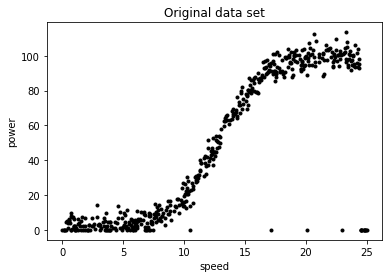

In [2]:
dataset = pd.read_csv("powerproduction.txt")

plt.title('Original data set')
plt.xlabel('speed')
plt.ylabel('power')
plt.plot(dataset.values[:,0], dataset.values[:,1], 'k.');

<br><br>
We can see from the graph above, there is a strong correlation between speed and power.<br> However, we have a few anomolies towards the end which will affect our prediction accuracy. <br><br>
It is possible that these 0 values at the end of the dataset represent a cut-off point for the wind turbine. However, because similar incidents occur earlier in the dataset, and because we don't have information on the workings of the wind turbine - we will assume these instances to be outliers. <br><br>

***
In order to determine which points are outliers, we will use `sklearn.cluster.DBSCAN` to cluster points together based on distance. <br>
* `sklearn.cluster.DBSCAN`:
  * **Parameters**:
    * *eps (float)*: The max distance between two samples for one to be considered as in the neighborhood of the other. <br> For this parameter, we will supply the mean distance between each point consecutively. 
    * *min_samples (int)*: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. 
  * **Attributes**:
    * *labels_*: Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

To calculate the mean distance between all points, I used `scipy.spatial.distance.pdist`. <br>
Provided an array and the metric `'euclidean'`, this function will compute the distance between each point in the array.

In [3]:
distances = list()
i = 0
j = i + 1
for t in dataset.values:
    # compute distance between points at index i and j
    d = spatial.distance.pdist(np.array([dataset.values[i], dataset.values[j]]), 'euclidean')
    distances.append(d[0])
    # if j reaches last index - break
    if j == dataset['speed'].values.size - 1:
        break
    # increment index vals 
    i = i + 1
    j = i + 1
        
# calculate mean distance between points
avg_dist = np.mean(distances)
avg_dist

5.6731936201644775

***
Now, passing in our average distance, we can perform `DBSCAN` clustering on the dataset to identify our outliers. 

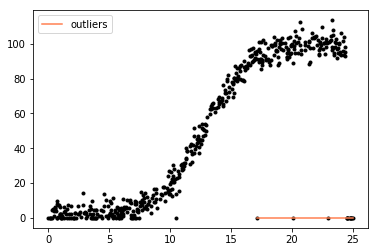

In [4]:
clustering = DBSCAN(eps=avg_dist, min_samples=15).fit(dataset)

# find outliers/anomolies (-1 denotes noisy data)
outliers = np.where(clustering.labels_ == -1)
outliers = outliers[0]

# Retrieve outlier wind/speed data
outlierPoints = dataset.values[outliers]

plt.plot(dataset.values[:,0], dataset.values[:,1], 'k.')
plt.plot(outlierPoints[:,0], outlierPoints[:,1], color='coral', label='outliers')
plt.legend();

<br><br>
Now we can ignore these outliers when creating our neural network.

In [5]:
new_dataset = dataset.drop(outliers)

Below, I have created a neural network with 3 neurons.

In [6]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(25, input_shape=(1,), activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(25, input_shape=(1,), activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

# Train the neural network on our data.
model.fit(new_dataset['speed'], new_dataset['power'], epochs=250, batch_size=10);

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/250
487/487 [==============================] - 0s 550us/sample - loss: 2275.1123
Epoch 2/250
487/487 [==============================] - 0s 131us/sample - loss: 2223.1221
Epoch 3/250
487/487 [==============================] - 0s 151us/sample - loss: 2174.8386
Epoch 4/250
487/487 [==============================] - 0s 208us/sample - loss: 2130.2984
Epoch 5/250
487/487 [==============================] - 0s 204us/sample - loss: 2089.4592
Epoch 6/250
487/487 [==============================] - 0s 184us/sample - loss: 2052.6356
Epoch 7/250
487/487 [==============================] - 0s 209us/sample - loss: 2018.2429
Epoch 8/250
487/487 [==============================] - 0s 198us/sample - loss: 1987.4485
Epoch 9/250
487/487 [==============================] - 0s 189us/sample - loss: 1959.1826
Epoch 10/250
487/487 [=========

487/487 [==============================] - 0s 161us/sample - loss: 62.6581
Epoch 83/250
487/487 [==============================] - 0s 173us/sample - loss: 59.1310
Epoch 84/250
487/487 [==============================] - 0s 175us/sample - loss: 56.6174
Epoch 85/250
487/487 [==============================] - 0s 177us/sample - loss: 52.6373
Epoch 86/250
487/487 [==============================] - 0s 179us/sample - loss: 50.1044
Epoch 87/250
487/487 [==============================] - 0s 178us/sample - loss: 47.2112
Epoch 88/250
487/487 [==============================] - 0s 174us/sample - loss: 44.9366
Epoch 89/250
487/487 [==============================] - 0s 177us/sample - loss: 42.4631
Epoch 90/250
487/487 [==============================] - 0s 177us/sample - loss: 40.3730
Epoch 91/250
487/487 [==============================] - 0s 180us/sample - loss: 38.4534
Epoch 92/250
487/487 [==============================] - 0s 180us/sample - loss: 36.9712
Epoch 93/250
487/487 [=======================

487/487 [==============================] - 0s 164us/sample - loss: 19.6554
Epoch 175/250
487/487 [==============================] - 0s 184us/sample - loss: 19.5854
Epoch 176/250
487/487 [==============================] - 0s 180us/sample - loss: 19.3058
Epoch 177/250
487/487 [==============================] - 0s 172us/sample - loss: 19.4957
Epoch 178/250
487/487 [==============================] - 0s 183us/sample - loss: 19.6191
Epoch 179/250
487/487 [==============================] - 0s 170us/sample - loss: 19.4457
Epoch 180/250
487/487 [==============================] - 0s 179us/sample - loss: 20.1172
Epoch 181/250
487/487 [==============================] - 0s 179us/sample - loss: 19.2958
Epoch 182/250
487/487 [==============================] - 0s 178us/sample - loss: 19.1530
Epoch 183/250
487/487 [==============================] - 0s 182us/sample - loss: 19.2270
Epoch 184/250
487/487 [==============================] - 0s 169us/sample - loss: 19.5728
Epoch 185/250
487/487 [============

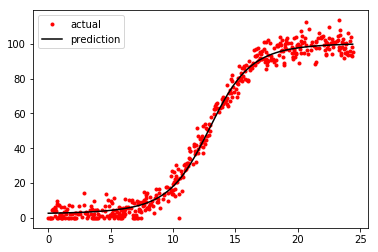

In [7]:
# Plot Model against dataset
plt.plot(new_dataset['speed'], new_dataset['power'], 'r.', label='actual')
plt.plot(new_dataset['speed'], model.predict(new_dataset['speed']), color='k', label='prediction')
plt.legend();

In [8]:
"""
Actual data - [15.591,81.239]
              [23.899,100.089]
              [11.987,47.268]
"""
model.predict([15.591, 24.750, 11.987])

array([[82.81552 ],
       [99.86901 ],
       [38.375694]], dtype=float32)

<br></br>
The below evaluation confirms a loss of around **18**. <br>

In [9]:
model.evaluate(new_dataset['speed'], new_dataset['power'])

487/487 [==============================] - 0s 184us/sample - loss: 18.5605


18.560480611280248

In [10]:
# Save model for server.py
model.save('model.h5')

***
**References:**
* Pandas.pydata.org; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
* Keras.io; https://keras.io/guides/sequential_model/
* Tensorflow.org; https://www.tensorflow.org/api_docs/python/tf/keras/models#functions
* Scipy.org; https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
* Scikit-learn.org; https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html